<a href="https://colab.research.google.com/github/DressaLuc/Supermarket-Sales-Analytics/blob/main/supermarket_sales_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise Exploratória de Dados - Vendas de supermercado

Este notebook realiza uma análise exploratória, como foco em:

- limpeza e tratamento de dados;
- verificação de campos vazios, valores duplicados ou nulos;
- Análise dos lucros das filiais e fatores influentes;
- Visualização gráfica com Seaborn e Matplotlib

## 1. Importação e visualização inicial dos dados


In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv('supermarket_sales.csv')
df.head()
df.info()
df.describe()
df.columns
df

Saving supermarket_sales.csv to supermarket_sales.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


## 2. Tradução das colunas para o português


In [ ]:
df.rename(columns={
    'Invoice ID': "ID da fatura",
    'Branch': 'Filial',
    'City': 'Cidade',
    'Customer type': 'Tipo de cliente',
    'Gender': 'Gênero',
    'Product line': 'Linha do produto',
    'Unit price': 'Preço unitário',
    'Quantity': 'Quantidade',
    'Tax 5%': 'Imposto de 5%',
    'Total': 'Total',
    'Date':'Data',
    'Time': 'Hora',
    'Payment': 'Forma de pagamento',
    'cogs': 'Custo de produção',
    'gross margin percentage': 'Porcentagem de margem bruta',
    'gross income': 'Renda bruta',
    'Rating' : 'Classificação'

}, inplace=True)

df['Gênero'] = df['Gênero'].replace({'Male': 'Masculino', 'Female': 'Feminino'})
df['Tipo de cliente'] = df['Tipo de cliente'].replace({'Member': 'Cliente Fidelidade', 'Normal': 'Cliente Comum'})
df['Forma de pagamento'] = df['Forma de pagamento'].replace({'Cash': 'Dinheiro', 'Credit card': 'Cartão de crédito', 'Ewallet': 'Carteira Digital'})

display(df) #visualizar se realmente as mudanças foram efetuadas

,ID da fatura,Filial,Cidade,Tipo de cliente,Gênero,Linha do produto,Preço unitário,Quantidade,Imposto de 5%,Total,Data,Hora,Forma de pagamento,Custo de produção,Porcentagem de margem bruta,Renda bruta,Classificação
0,750-67-8428,A,Yangon,Cliente Fidelidade,Feminino,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Carteira Digital,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Cliente Comum,Feminino,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Dinheiro,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Cliente Comum,Masculino,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Cartão de crédito,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Cliente Fidelidade,Masculino,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Carteira Digital,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Cliente Comum,Masculino,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Carteira Digital,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Cliente Comum,Masculino,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Carteira Digital,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Cliente Comum,Feminino,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Carteira Digital,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Cliente Fidelidade,Masculino,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Dinheiro,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Cliente Comum,Masculino,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Dinheiro,65.82,4.761905,3.2910,4.1


## 3. Dicionários de siglas das Linhas de produtos


In [ ]:
siglas = {
    'Electronic accessories': 'EACC',
    'Fashion accessories': 'FACC',
    'Food and beverages': 'FBV',
    'Health and beauty': 'HB',
    'Home and lifestyle': 'HL',
    'Sports and travel': 'ST'
}

#para aplicar as siglas
df['Linha do produto'] = df['Linha do produto'].replace(siglas)
display(df)

,ID da fatura,Filial,Cidade,Tipo de cliente,Gênero,Linha do produto,Preço unitário,Quantidade,Imposto de 5%,Total,Data,Hora,Forma de pagamento,Custo de produção,Porcentagem de margem bruta,Renda bruta,Classificação
0,750-67-8428,A,Yangon,Cliente Fidelidade,Feminino,HB,74.69,7,26.1415,548.9715,1/5/2019,13:08,Carteira Digital,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Cliente Comum,Feminino,EACC,15.28,5,3.8200,80.2200,3/8/2019,10:29,Dinheiro,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Cliente Comum,Masculino,HL,46.33,7,16.2155,340.5255,3/3/2019,13:23,Cartão de crédito,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Cliente Fidelidade,Masculino,HB,58.22,8,23.2880,489.0480,1/27/2019,20:33,Carteira Digital,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Cliente Comum,Masculino,ST,86.31,7,30.2085,634.3785,2/8/2019,10:37,Carteira Digital,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Cliente Comum,Masculino,HB,40.35,1,2.0175,42.3675,1/29/2019,13:46,Carteira Digital,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Cliente Comum,Feminino,HL,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Carteira Digital,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Cliente Fidelidade,Masculino,FBV,31.84,1,1.5920,33.4320,2/9/2019,13:22,Dinheiro,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Cliente Comum,Masculino,HL,65.82,1,3.2910,69.1110,2/22/2019,15:33,Dinheiro,65.82,4.761905,3.2910,4.1


## 4. Verificar os valores nulos

In [ ]:
df.isnull().sum()

,0
ID da fatura,0
Filial,0
Cidade,0
Tipo de cliente,0
Gênero,0
Linha do produto,0
Preço unitário,0
Quantidade,0
Imposto de 5%,0
Total,0


## 5. Identificando colunas e strings vazias (células NaN ou vazias)

In [ ]:
(df.isnull() | (df == '')).sum()



,0
ID da fatura,0
Filial,0
Cidade,0
Tipo de cliente,0
Gênero,0
Linha do produto,0
Preço unitário,0
Quantidade,0
Imposto de 5%,0
Total,0


## 6. Eliminando dados duplicados

In [ ]:
df.duplicated().sum()

np.int64(0)

## 7. Agrupamento de dados por filial

In [ ]:
filial_resumo = df.groupby('Filial').agg({
    'Quantidade': 'sum',
    'Forma de pagamento': lambda x: x.mode()[0], #forma de pagamento mais comum
    'Custo de produção': 'sum',
    'Porcentagem de margem bruta': 'mean',
    'Renda bruta': 'sum',
    'Classificação': 'mean'
}).reset_index()

filial_resumo

,Filial,Quantidade,Forma de pagamento,Custo de produção,Porcentagem de margem bruta,Renda bruta,Classificação
0,A,1859,Carteira Digital,101143.21,4.761905,5057.1605,7.027059
1,B,1820,Carteira Digital,101140.64,4.761905,5057.0320,6.818072
2,C,1831,Dinheiro,105303.53,4.761905,5265.1765,7.072866


## 8. Calcular participação percentual no lucro

In [ ]:
filial_resumo['Pct_resumo'] = 100 * filial_resumo['Renda bruta']/filial_resumo['Renda bruta'].sum()
display(filial_resumo)

,Filial,Quantidade,Forma de pagamento,Custo de produção,Porcentagem de margem bruta,Renda bruta,Classificação,Pct_resumo
0,A,1859,Carteira Digital,101143.21,4.761905,5057.1605,7.027059,32.882757
1,B,1820,Carteira Digital,101140.64,4.761905,5057.0320,6.818072,32.881921
2,C,1831,Dinheiro,105303.53,4.761905,5265.1765,7.072866,34.235322


## 9. Filial vs Custo de Produção

In [ ]:
custo_medio = df.groupby('Filial')['Custo de produção'].mean().reset_index()
custo_medio.rename(columns={'cogs':'Custo médio de produção'}, inplace=True)
custo_medio


,Filial,Custo de produção
0,A,297.480029
1,B,304.640482
2,C,321.047348


## 10. Filial x Forma de Pagamento

In [ ]:
pd.crosstab(
    index=df['Filial'],
    columns=df['Forma de pagamento'],
    normalize='index' #para mostrar proporção ao invés de contagem absoluta

).round(2)

Forma de pagamento,Carteira Digital,Cartão de crédito,Dinheiro
Filial,,,
A,0.37,0.31,0.32
B,0.34,0.33,0.33
C,0.32,0.30,0.38


## 11. Filal x Renda Bruta

In [ ]:
pd.crosstab(
    index=df['Filial'],
    columns='Renda bruta',
    values=df['Renda bruta'],
    aggfunc='sum'
).round(2)

col_0,Renda bruta
Filial,
A,5057.16
B,5057.03
C,5265.18


## 12. Visualização do lucro bruto por filial

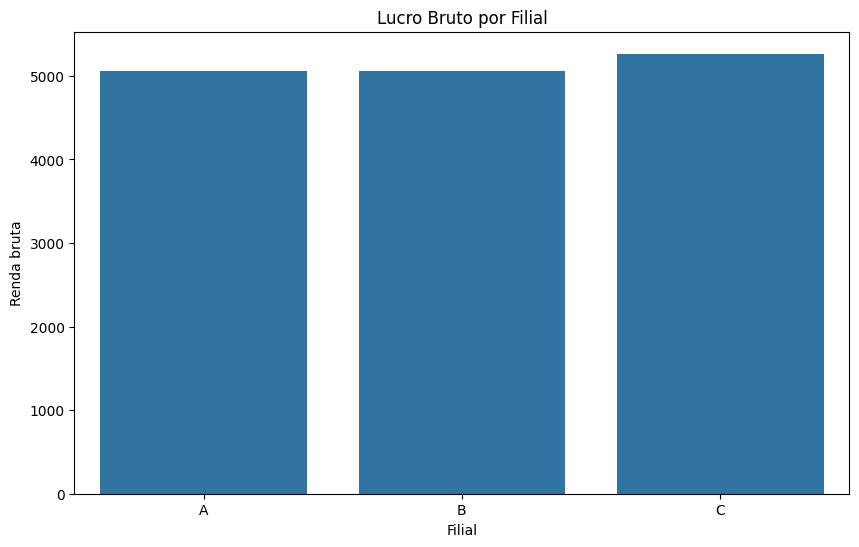

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

sns.barplot(data=filial_resumo, x='Filial', y='Renda bruta')
plt.title('Lucro Bruto por Filial')
plt.show()



## 13. Percentual de lucro por filial

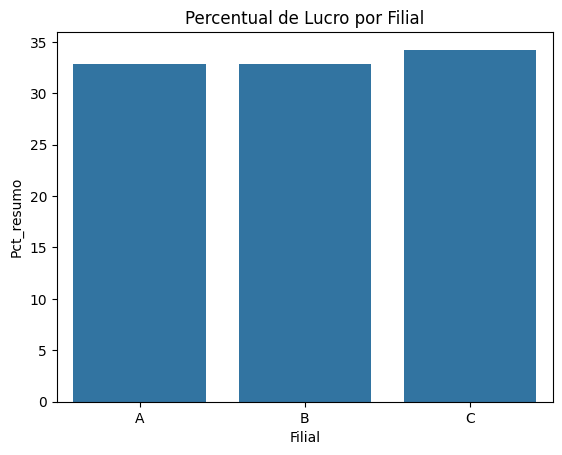

In [ ]:
sns.barplot(data=filial_resumo, x='Filial', y='Pct_resumo')
plt.title('Percentual de Lucro por Filial')
plt.show()

## 14. Análise descritiva por grupo

In [ ]:
#Agrupar e tirar a média do Lucro bruto por cidade, gênero  elinha de produto

agrupamentos = {
    'Cidade': df.groupby('Cidade')['Renda bruta'].mean(),
    'Gênero': df.groupby('Gênero')['Renda bruta'].mean(),
    'Tipo de cliente': df.groupby('Tipo de cliente')['Renda bruta'].mean(),
    'Linha do produto': df.groupby('Linha do produto')['Renda bruta'].mean()
}

for chave, valor in agrupamentos.items():
    print(f'\nMédia do Lucro Bruto por {chave}:\n')
    print(valor) # Add print(valor) to display the grouped data


Média do Lucro Bruto por Cidade:

Cidade
Mandalay     15.232024
Naypyitaw    16.052367
Yangon       14.874001
Name: Renda bruta, dtype: float64

Média do Lucro Bruto por Gênero:

Gênero
Feminino     15.956936
Masculino    14.799487
Name: Renda bruta, dtype: float64

Média do Lucro Bruto por Tipo de cliente:

Tipo de cliente
Cliente Comum         15.148707
Cliente Fidelidade    15.609110
Name: Renda bruta, dtype: float64

Média do Lucro Bruto por Linha do produto:

Linha do produto
EACC    15.220597
FACC    14.528062
FBV     15.365310
HB      15.411572
HL      16.030331
ST      15.812630
Name: Renda bruta, dtype: float64


## 15. Renda bruta por cidade

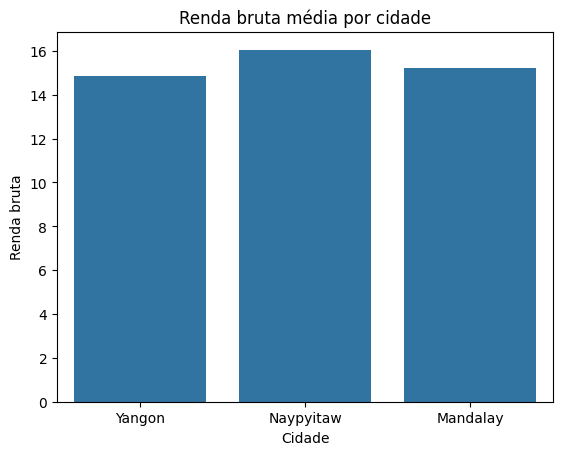

In [ ]:
# Renda bruta por cidade
sns.barplot(data=df, x='Cidade', y='Renda bruta', estimator='mean', errorbar=None)
plt.title('Renda bruta média por cidade')
plt.show()

## 16. Renda bruta por Gênero

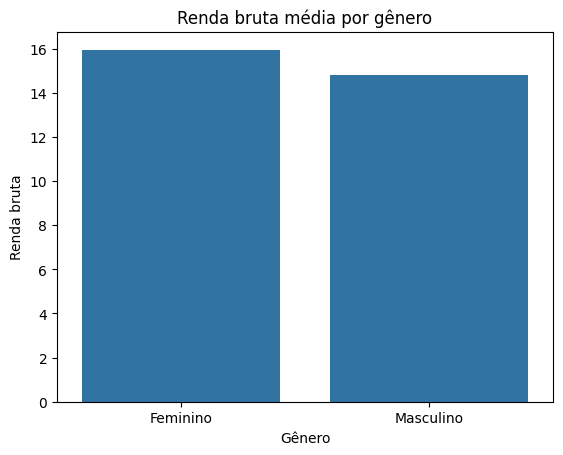

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='Gênero', y='Renda bruta', estimator='mean', errorbar=None)
plt.title('Renda bruta média por gênero')
plt.show()

## 17. Renda média bruta por Tipo de cliente

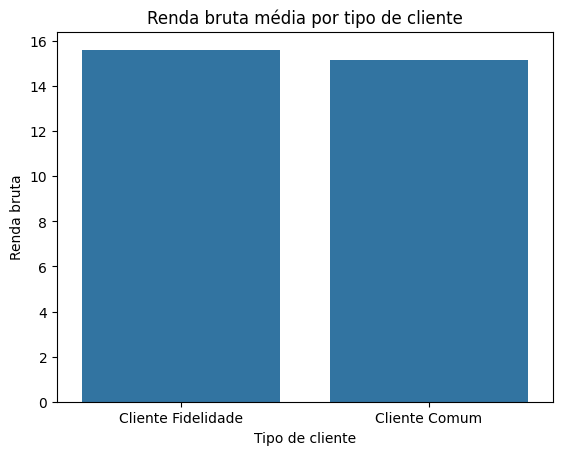

In [ ]:
sns.barplot(data=df, x='Tipo de cliente', y='Renda bruta', estimator='mean', errorbar=None)
plt.title('Renda bruta média por tipo de cliente')
plt.show()

## 18. Renda bruta média por linha de produto

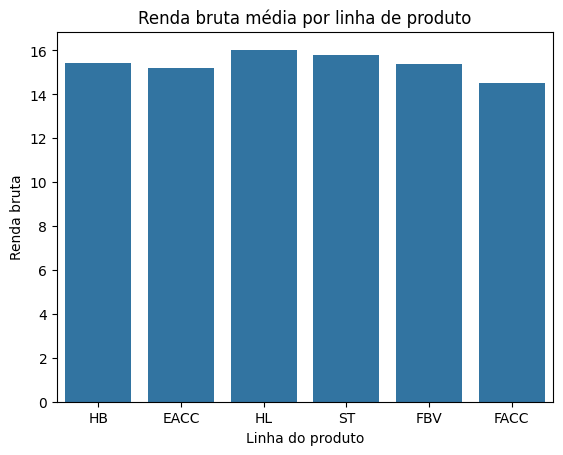

In [ ]:
sns.barplot(data=df, x='Linha do produto', y='Renda bruta', estimator='mean', errorbar=None)
plt.title('Renda bruta média por linha de produto')
plt.show()


## 19. Legenda de linhas dos produtos:

- HB : Saúde e beleza;
- EACC : Acessórios eletrônicos;
- HL : Casa e Estilo de vida;
- ST: Esportes e viagens;
- FBV: Comidas e bebidas;
- FACC: Acessórios femininos.

## 20. Gênero por filial

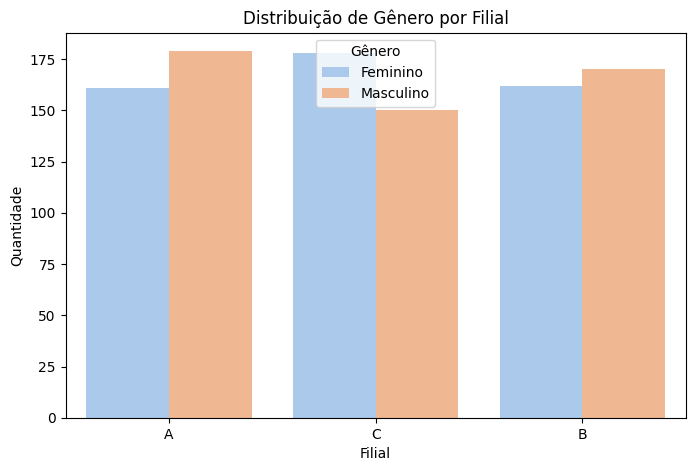

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Filial', hue='Gênero', palette='pastel')
plt.title('Distribuição de Gênero por Filial')
plt.xlabel('Filial')
plt.ylabel('Quantidade')
plt.legend(title='Gênero')
plt.show()

## 21. Tipo de cliente por filial

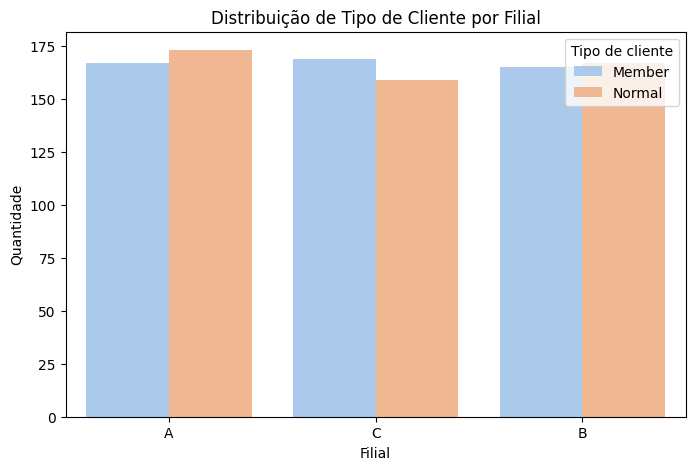

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Filial', hue='Tipo de cliente', palette='pastel')
plt.title('Distribuição de Tipo de Cliente por Filial')
plt.xlabel('Filial')
plt.ylabel('Quantidade')
plt.legend(title = 'Tipo de cliente')
plt.show()

## 22. Linha de produto por filial

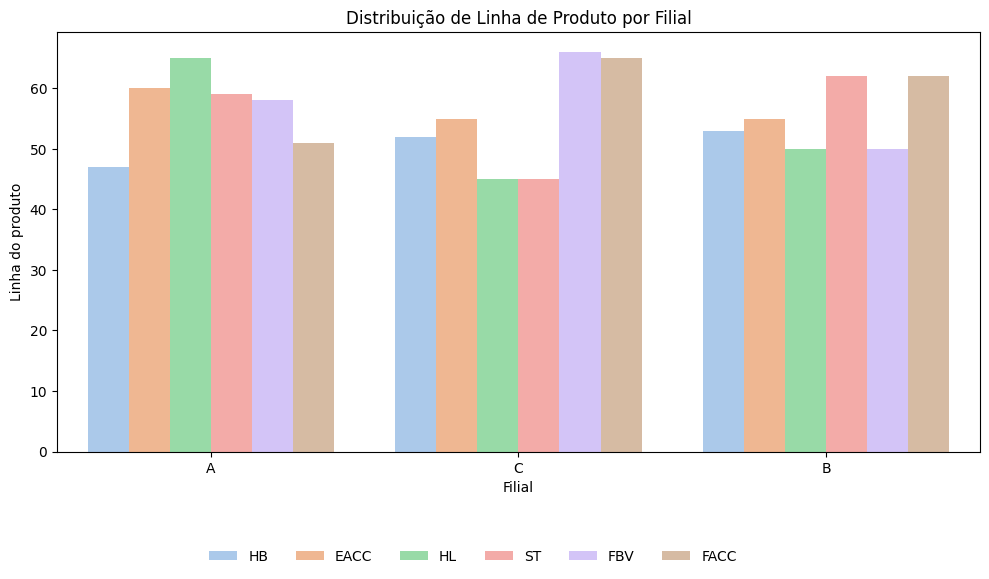

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Filial', hue='Linha do produto', palette = 'pastel')

plt.title('Distribuição de Linha de Produto por Filial')
plt.xlabel('Filial')
plt.ylabel('Linha do produto')

#Ajuste da legenda

plt.legend(
    loc='center right',
    bbox_to_anchor=(0.75, -0.25),
    ncol=6,
    frameon=False)

plt.tight_layout()
plt.show()

## 23. Correlações entre as variáveis

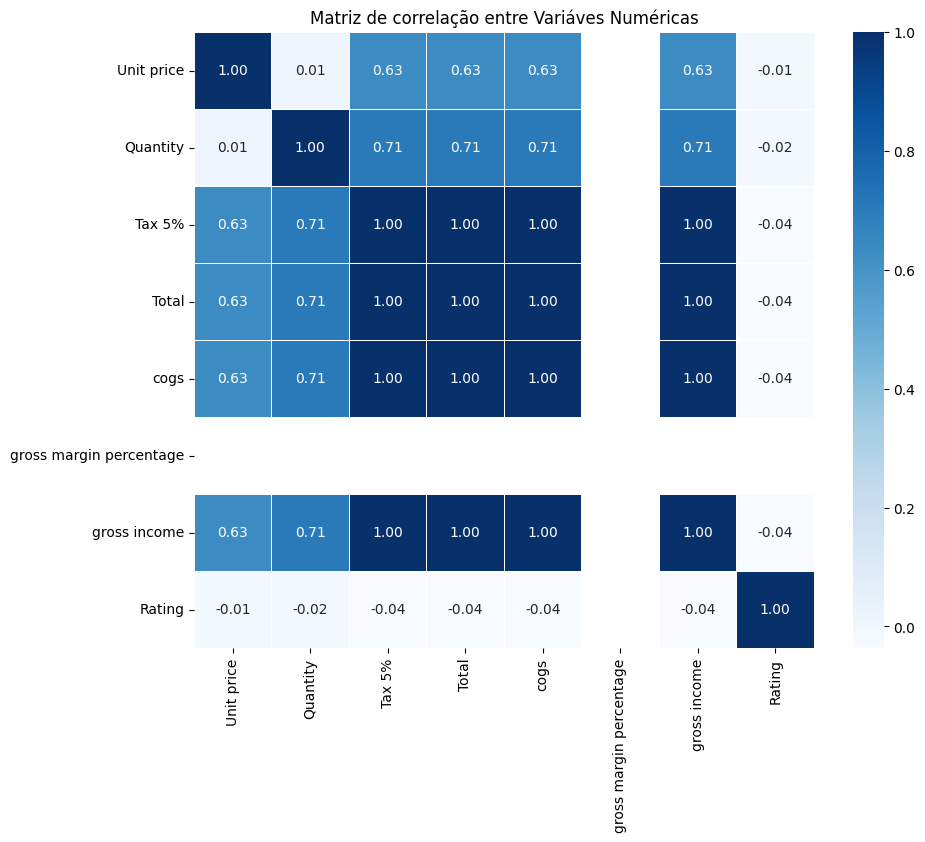

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

if 'df' not in locals():
  print("DataFrame not found, loading data...")
  uploaded = files.upload()
  df = pd.read_csv('supermarket_sales.csv')
  df.rename(columns={
      'Invoice ID': "ID da fatura",
      'Branch': 'Filial',
      'City': 'Cidade',
      'Customer type': 'Tipo de cliente',
      'Gender': 'Gênero',
      'Product line': 'Linha do produto',
      'Unit price': 'Preço unitário',
      'Quantity': 'Quantidade',
      'Tax 5%': 'Imposto de 5%',
      'Total': 'Total',
      'Date':'Data',
      'Time': 'Hora',
      'Payment': 'Forma de pagamento',
      'cogs': 'Custo de produção',
      'gross margin percentage': 'Porcentagem de margem bruta',
      'gross income': 'Renda bruta',
      'Rating' : 'Classificação'

  }, inplace=True)

  df['Gênero'] = df['Gênero'].replace({'Male': 'Masculino', 'Female': 'Feminino'})
  df['Tipo de cliente'] = df['Tipo de cliente'].replace({'Member': 'Cliente Fidelidade', 'Normal': 'Cliente Comum'})
  df['Forma de pagamento'] = df['Forma de pagamento'].replace({'Cash': 'Dinheiro', 'Credit card': 'Cartão de crédito', 'Ewallet': 'Carteira Digital'})

corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlação entre Variáves Numéricas', fontsize=12)
plt.show()

In [ ]:
df.columns.tolist()

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

## tentativa de gerar novamente a tabela de correlação

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Preço unitário', 'Quantidade', 'Imposto de 5%',
       'Total', 'Date', 'Time', 'Payment', 'Custo de produção',
       'Porcentagem de margem bruta', 'Renda bruta', 'Classificação'],
      dtype='object')


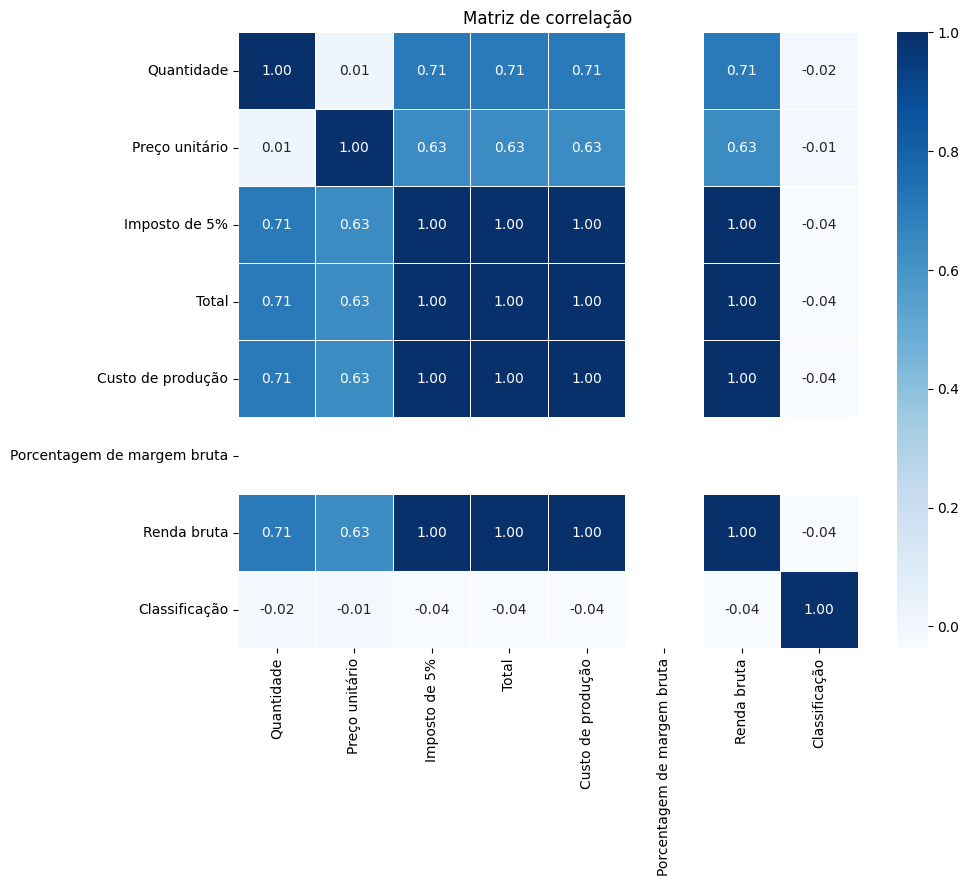

In [ ]:
df = df.rename(columns={
    'Quantity': 'Quantidade',
    'Unit price': 'Preço unitário',
    'Tax 5%': 'Imposto de 5%',
    'Total': 'Total',
    'cogs': 'Custo de produção',
    'gross margin percentage': 'Porcentagem de margem bruta',
    'gross income': 'Renda bruta',
    'Rating': 'Classificação'
})

import matplotlib.pyplot as plt
import seaborn as sns

#Lista com variáveis a serem análisadas
numeric_cols = ['Quantidade','Preço unitário','Imposto de 5%','Total','Custo de produção','Porcentagem de margem bruta','Renda bruta','Classificação']

# Print the DataFrame columns to help diagnose the error
print(df.columns)

#Para gerar uma nova matriz de correlação
correlation_matrix = df[numeric_cols].corr()

#Plotando a nova matriz
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', linewidths=.5)
plt.title('Matriz de correlação')
plt.show()

In [ ]:
df['Porcentagem de margem bruta'].head()
df['Porcentagem de margem bruta'].dtype

dtype('float64')

In [ ]:
df['Porcentagem de margem bruta'].isna().sum()
df['Porcentagem de margem bruta'].nunique()
df['Porcentagem de margem bruta'].describe()

,Porcentagem de margem bruta
count,1.000000e+03
mean,4.761905e+00
std,6.131498e-14
min,4.761905e+00
25%,4.761905e+00
50%,4.761905e+00
75%,4.761905e+00
max,4.761905e+00


## 23. Visualização de correlações (parte 2)

Loading data and applying translations...


Saving supermarket_sales.csv to supermarket_sales (1).csv


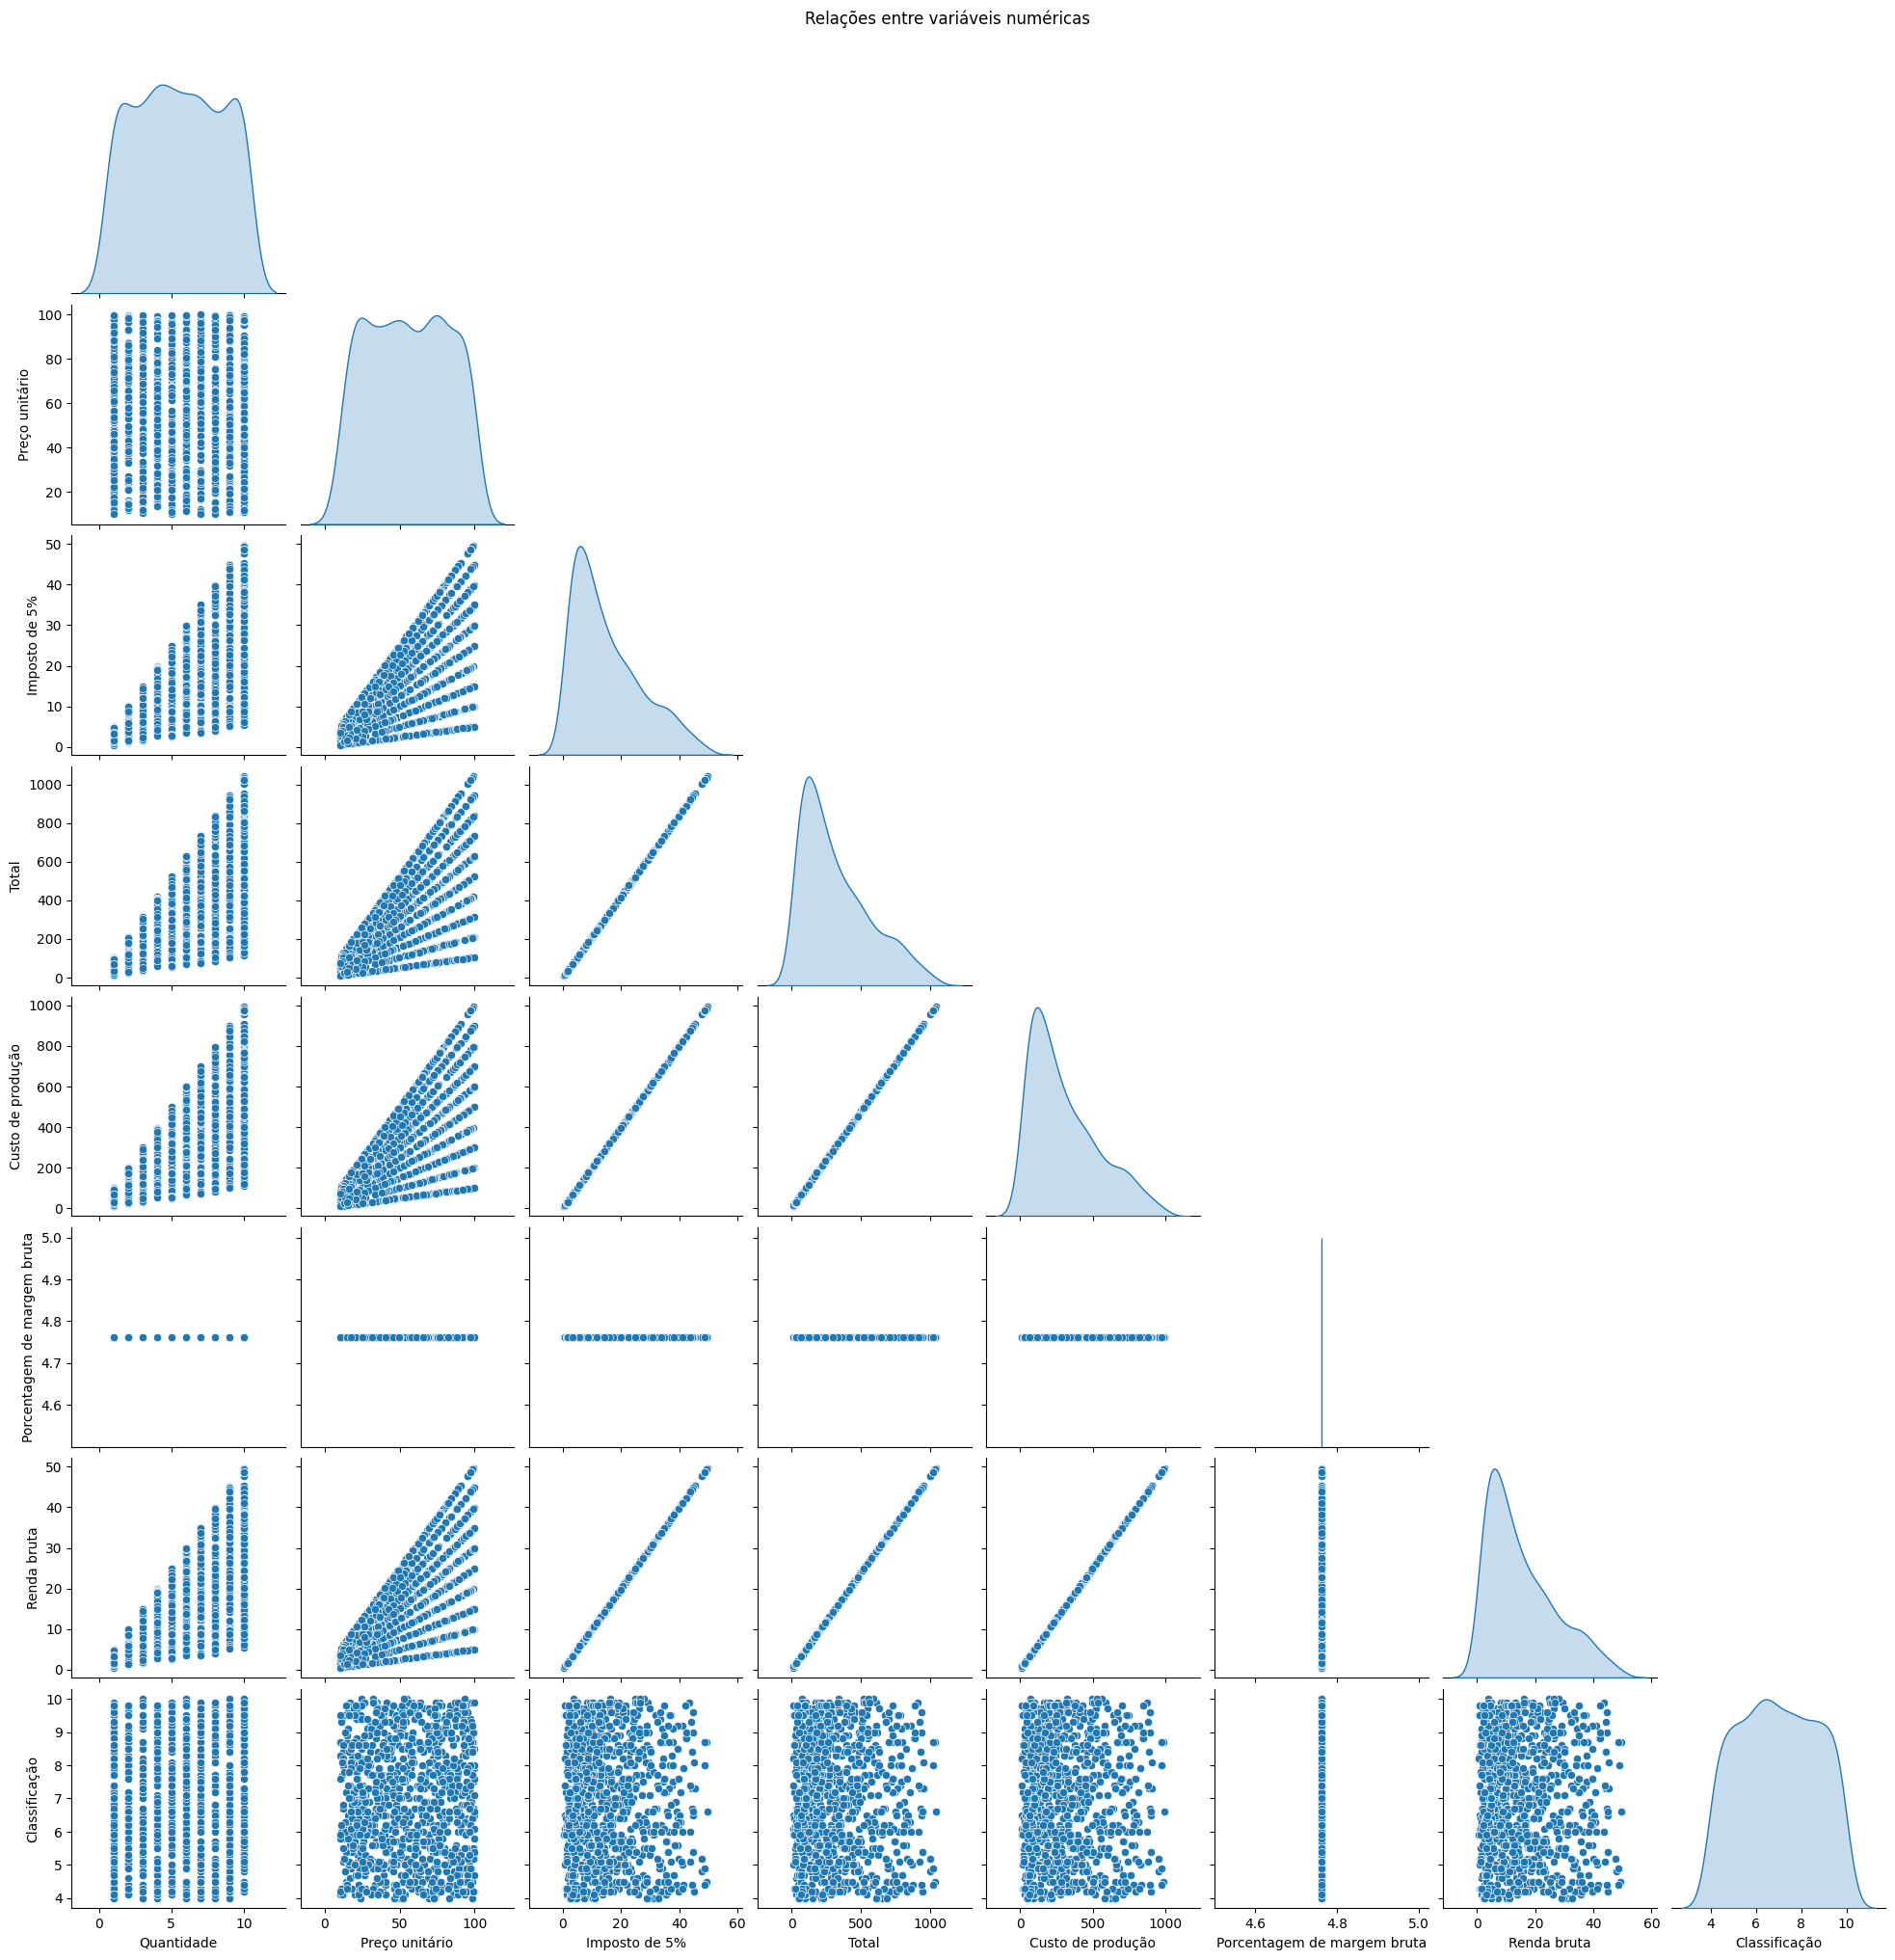

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Load the dataset if it's not already loaded and apply translations
print("Loading data and applying translations...")
uploaded = files.upload()
df = pd.read_csv('supermarket_sales.csv')

# Translate columns to Portuguese and replace values
df.rename(columns={
    'Invoice ID': "ID da fatura",
    'Branch': 'Filial',
    'City': 'Cidade',
    'Customer type': 'Tipo de cliente',
    'Gender': 'Gênero',
    'Product line': 'Linha do produto',
    'Unit price': 'Preço unitário',
    'Quantity': 'Quantidade',
    'Tax 5%': 'Imposto de 5%',
    'Total': 'Total',
    'Date':'Data',
    'Time': 'Hora',
    'Payment': 'Forma de pagamento',
    'cogs': 'Custo de produção',
    'gross margin percentage': 'Porcentagem de margem bruta',
    'gross income': 'Renda bruta',
    'Rating' : 'Classificação'

}, inplace=True)

df['Gênero'] = df['Gênero'].replace({'Male': 'Masculino', 'Female': 'Feminino'})
df['Tipo de cliente'] = df['Tipo de cliente'].replace({'Member': 'Cliente Fidelidade', 'Normal': 'Cliente Comum'})
df['Forma de pagamento'] = df['Forma de pagamento'].replace({'Cash': 'Dinheiro', 'Credit card': 'Cartão de crédito', 'Ewallet': 'Carteira Digital'})


numeric_cols = ['Quantidade', 'Preço unitário', 'Imposto de 5%', 'Total', 'Custo de produção', 'Porcentagem de margem bruta', 'Renda bruta', 'Classificação']

sns.pairplot(df[numeric_cols], diag_kind='kde', corner=True)
plt.suptitle('Relações entre variáveis numéricas', y=1.02)
plt.show()

## 23. Conclusões

1. Comparação entre as filiais

- A filial A possui a maior quantidade de produtos (1859), seguida pelas filiais C (1831) e B (1820);

- Apesar disso, a Filial C representa 34,23% do lucro total, supeano as filiais A e B (32,88% cada), indicando maior eficiência na conversão de vendas em lucro;

- Considerando a quantidade de produtos, a Filial B demonstra desempenho superior à Filial A.

2. Renda e pagamentos

- A Filial C registrou a maior renda bruta, associada a uma maior proporção de pagamentos em dinheiro;

- Mesmo com custos de produção mais altos, a Filial C apresentou o maior lucro bruto médio.

3. Análise por cidade

- A média de lucro bruto por cidade é maior em Maypitan e menor em Yangon.

4. Perfil do cliente

- Na Filial C, há predominância de clientes mulheres, o que contribui para o aumento da renda média bruta. Nas filiais A e B, predominam clientes homens, correspondendo a menor participação na renda média.

- A fidelização de clientes também impacta positivamente: filiais A e B têm mais clientes comuns, enquanto a Filial C tem mais clientes fidelidade, o que favorece a renda bruta.

5. Contribuição por linha de produto

- Apesar da categoria "acessórios femininos" ter menor contribuição geral, na Filial C ela, junto com "comidas e bebidas", impulsiona a renda bruta média.

- Para a Filial B, "Esportes e Viagens" e "acessórios femininos" apresentam maior impacto na renda bruta média.

- Em termos de lucro bruto médio, "Esportes e Viagens" e "Saúde e beleza" são as linhas mais relevantes, sugerindo oportunidades de investimento ns filiais A e B.

6. Estratégias de melhoria

- Para aumentar a lucratividade nas filiais A e B, recomenda-se alinhar a quantidade de produtos ao público predominante e investir em estratégias de fidelização.

7. Análise de correlações

- O preço unitário tem correlação fraca com a quantidade de produtos; valores elevados não impactam significativamente o volume de compras.

- Quantidade, preço unitário, imposto de 5%, total e custo de produção apresentam correlações negativas e fracas com a classificação dos produtos pelo cliente.

- Imposto de 5%, total e custo de produção apresentam correlação intermediária com quantidade (0,71) e preço unitário (0,63), indicando que impostos influenciam o preço, mas não necessariamente reduzem a quantidade comprada.

- O motivo da coluna "Porcentagem de margem de lucro" aparecer em branco na matriz de correlação pode ser apresentado pelo resultado apresentados a partir do comando describe, mostrando que o desvio padrão é de praticamente zero. A coluna Porcentagem de margem de lucro apresenta valor constante de, aproximadamente, 4.76% em todas as observações. Por isso, não foi possível calcular a correlação com as demais variáveis, já que a ausência de variação torna a correlação estatisticamente indefinida.

- A partir da análise do pair plot, foi possível verificar o caráter fortemente linear das correlações entre as variáveis Total, Custo de produção e renda bruta, uma vez que estão intrínsecamente ligadas e são interdependentes. Por outro lado, a linearidade pode ser observada em relação ao preço unitário, mas não com a mesma intensidade, havendo variabilidade com o aumento dos valores. Já a porcentagem de margem bruta apresenta constância observada na matriz de correlção, com a colunas em branco devido ao valor do desvio padrão próximo de zero.

8. Observação estratégica

- Seria interessante investigar se o aumento da oferta de acessórios femininos na Filial C foi resultado de uma demanda pré-existente ou se atraiu o público feminino. Essa análise ajudaria a definir estratégias de marketing e distribuição das linhas de produto de forma mais eficiente.